In [61]:
import math
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

### 读取csv数据

In [2]:
# 读取csv数据
train_df = pd.read_csv('train.csv')
train_df.head(10)

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0031c258.jpg,new_whale
8,0035632e.jpg,w_3d0bc7a
9,0037e7d3.jpg,w_50db782


In [3]:
train_df.describe()

,Image,Id
count,9850,9850
unique,9850,4251
top,41d00b14.jpg,new_whale
freq,1,810


### one-hot 编码

In [4]:
train_data = pd.concat([train_df, pd.get_dummies(train_df.Id, prefix='Id')], axis=1)
train_data.head()

,Image,Id,Id_new_whale,Id_w_0013924,Id_w_001ebbc,Id_w_002222a,Id_w_002b682,Id_w_002dc11,Id_w_0087fdd,Id_w_008c602,...,Id_w_ff70408,Id_w_ff7630a,Id_w_ff94ad6,Id_w_ffa7427,Id_w_ffa78a5,Id_w_ffb4e3d,Id_w_ffbd74c,Id_w_ffcd98e,Id_w_ffda8b2,Id_w_ffdab7a
0,00022e1a.jpg,w_e15442c,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000466c4.jpg,w_1287fbc,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00087b01.jpg,w_da2efe0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001296d5.jpg,w_19e5482,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0014cfdf.jpg,w_f22f3e3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 显示样例图片

In [5]:
INPUT_DIR = 'train'
TEST_DIR = 'test'

In [6]:
# 显示图片
def plot_image_for_filename(filenames, labels, rows=4):
    imgs = [plt.imread(f'{INPUT_DIR}/{filename}') for filename in filenames]
    return plot_images(imgs, labels ,rows)

def plot_images(imgs, labels, rows=4):
    figure = plt.figure(figsize=(13,8))
    cols = len(imgs) // rows + 1
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i], cmap='gray')

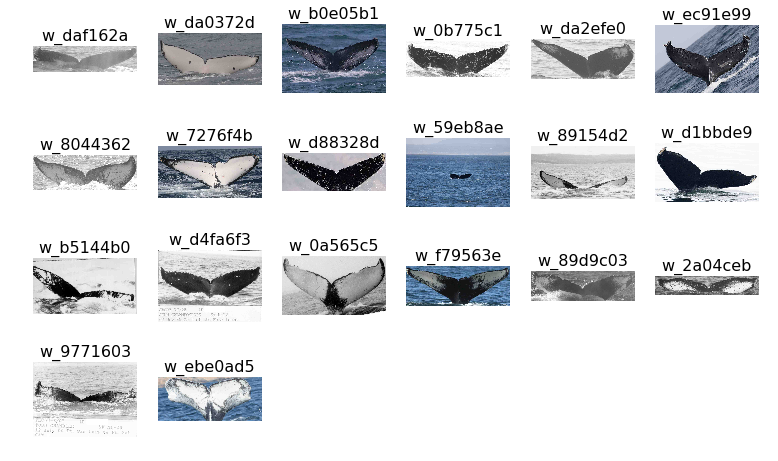

In [7]:
rand_row = train_df.sample(frac=1.)[:20]
imgs = list(rand_row['Image'])
labels = list(rand_row['Id'])
plot_image_for_filename(imgs, labels)

### 种类数

In [8]:
num = len(train_df['Id'].unique())
print('categories number:', num)

categories number: 4251


### 各种类图片数量分布

In [9]:
size_bucket = Counter(train_df['Id'].value_counts().values)
size_bucket

Counter({1: 2220,
         2: 1034,
         3: 492,
         4: 192,
         5: 102,
         6: 61,
         7: 40,
         8: 23,
         9: 21,
         10: 9,
         11: 7,
         12: 7,
         13: 9,
         14: 5,
         15: 4,
         16: 5,
         17: 4,
         18: 2,
         19: 2,
         20: 1,
         21: 3,
         22: 3,
         23: 1,
         26: 1,
         27: 1,
         34: 1,
         810: 1})

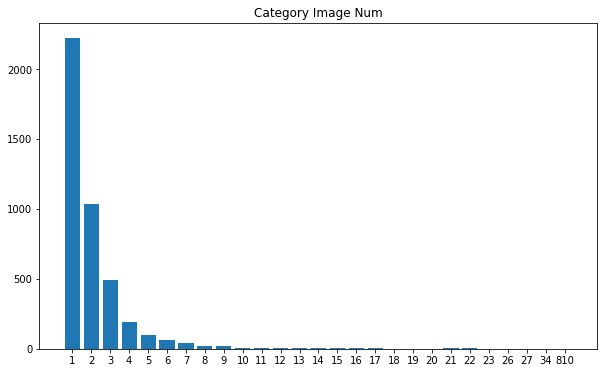

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(size_bucket)), list(size_bucket.values())[::-1], align='center')
plt.xticks(range(len(size_bucket)), list(size_bucket.keys())[::-1])
plt.title('Category Image Num')
plt.show()

In [11]:
train_df['Id'].value_counts().head(20)

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_693c9ee     22
w_ab4cae2     22
w_987a36f     21
w_43be268     21
w_73d5489     21
w_f19faeb     20
w_9b401eb     19
w_95874a5     19
w_c0d494d     18
w_b7d5069     18
w_18eee6e     17
w_dbda0d6     17
w_0e737d0     17
w_eb0a6ed     17
Name: Id, dtype: int64

### 图片概览 (前2)

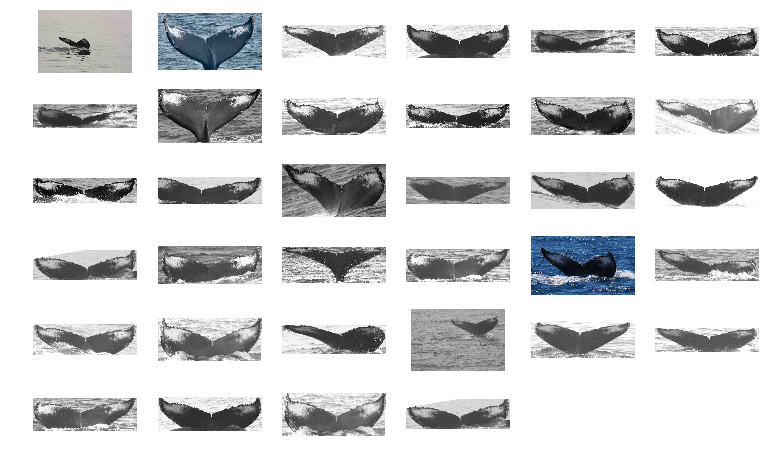

In [12]:
w_1287fbc = train_df[train_df['Id'] == 'w_1287fbc']
plot_image_for_filename(w_1287fbc['Image'], None, rows=6)

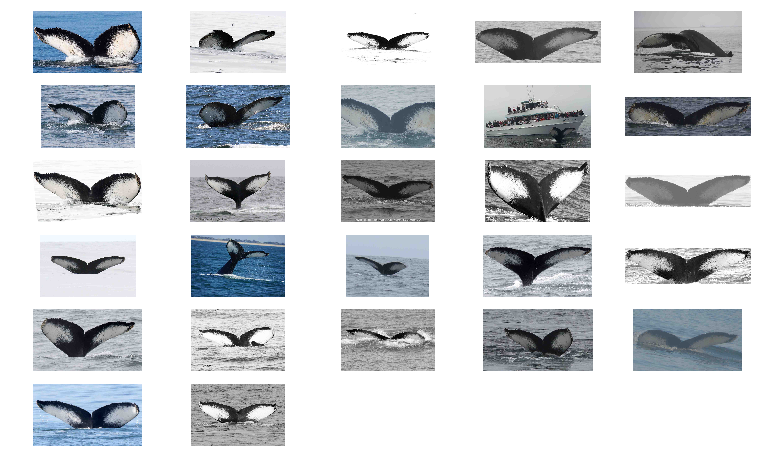

In [13]:
w_98baff9 = train_df[train_df['Id'] == 'w_98baff9']
plot_image_for_filename(w_98baff9['Image'], None, rows=6)

### 图片概览 (尾8)

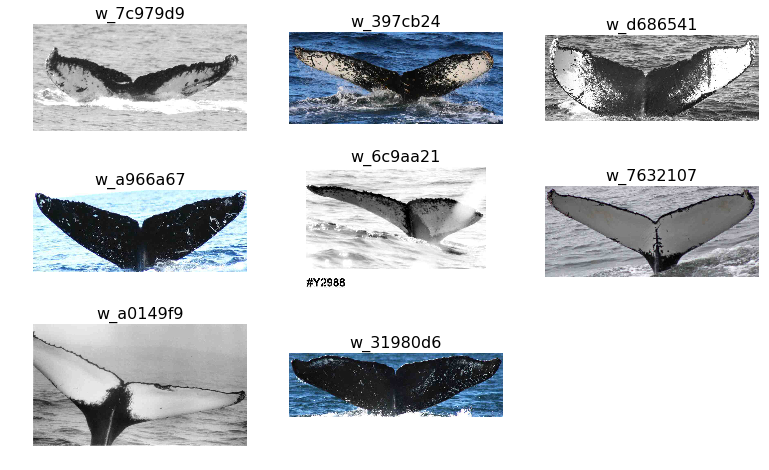

In [14]:
one_image_ids = train_df['Id'].value_counts().tail(8).keys()
one_image_filenames = []
labels = []
for i in one_image_ids:
    one_image_filenames.extend(list(train_df[train_df['Id'] == i]['Image']))
    labels.append(i)

plot_image_for_filename(one_image_filenames, labels, rows=3)

### 增加数据

In [15]:
from keras.preprocessing.image import(
    random_rotation, random_shift, random_shear, random_zoom,
    random_channel_shift, transform_matrix_offset_center, img_to_array)
import random

/Users/ljj/anaconda/envs/python3env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


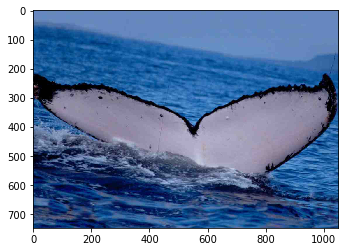

In [16]:
img = Image.open(f'{INPUT_DIR}/ff38054f.jpg')
img_arr = img_to_array(img)
plt.imshow(img)

### Example - 旋转， 灰度图

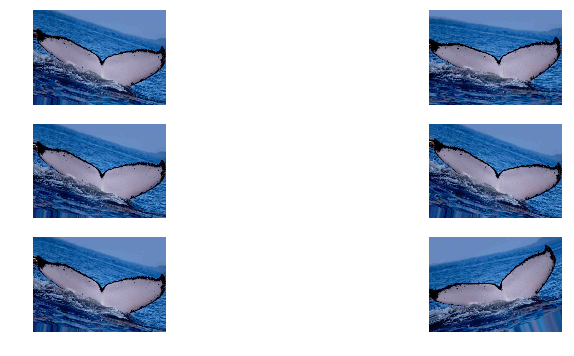

In [17]:
# 旋转
imgs = [
    255 * random_rotation(img_arr, 30, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest') for _ in range(6)
]
plot_images(imgs, None, rows=4)

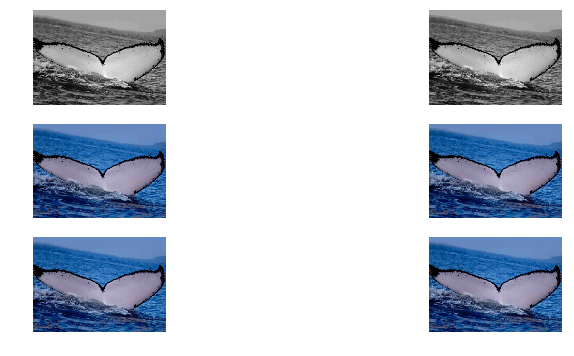

In [18]:
# 灰度图像
def random_greyscale(img, p):
    if random.random() < p:
        return np.dot(img[..., :3], [0.299, 0.587, 0.114])
    return img

imgs = [random_greyscale(img_arr, 0.5) * 255 for _ in range(6)]
plot_images(imgs, None)

### 载入图片数据，增大数据集，训练模型

In [74]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [62]:
image_gen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 15,
    width_shift_range = .15,
    height_shift_range = .15,
    horizontal_flip=True
)

# 将数据转为字典
Label_dict = OrderedDict(zip(train_df['Image'], train_df['Id']))

# 读取所有图片，转换大小为64*64
SIZE = 64
def importImage(filename):
    img = Image.open(filename).convert('LA').resize((SIZE, SIZE))
    return np.array(img)[:, :, 0]

train_img = np.array([importImage(INPUT_DIR + '/' + img) for img in Label_dict.keys()])

In [78]:
x_train = train_img.reshape((-1, SIZE, SIZE, 1))
image_gen.fit(x_train, augment=True)

In [79]:
len(x_train)

9850

In [80]:
onehot_columns = train_data.columns[2:]
onehot_label = train_data.as_matrix(columns=onehot_columns)

### Model

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [86]:
batch_size = 128
num_classes = len(onehot_label[0])
epochs = 9
input_shape = x_train[0].shape

In [83]:
print('Train data shape:', train_img.shape)
print('Train img sample shape:', train_img[0].shape)
print('Train label shape:', onehot_label.shape)

Train data shape: (9850, 64, 64)
Train img sample shape: (64, 64)
Train label shape: (9850, 4251)


In [88]:
model = Sequential()
model.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.33))
model.add(Flatten())
model.add(Dense(36, activation='sigmoid'))
model.add(Dropout(0.33))
model.add(Dense(36, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 48)        480       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 48)        20784     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 48)        57648     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 48)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
__________

In [ ]:
model.fit_generator(image_gen.flow(x_train, onehot_label, batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,
          epochs=epochs,
          verbose=1)